In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import sklearn

import numpy as np

In [2]:
data = pd.read_csv("cancer patient data sets.csv")

In [3]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
data.shape

(1000, 26)

In [5]:
data.drop(['index', 'Patient Id'], axis = 1, inplace = True)

In [6]:
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
data['Level']=data['Level'].map(mapping)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [8]:
data.isnull().any()

Age                         False
Gender                      False
Air Pollution               False
Alcohol use                 False
Dust Allergy                False
OccuPational Hazards        False
Genetic Risk                False
chronic Lung Disease        False
Balanced Diet               False
Obesity                     False
Smoking                     False
Passive Smoker              False
Chest Pain                  False
Coughing of Blood           False
Fatigue                     False
Weight Loss                 False
Shortness of Breath         False
Wheezing                    False
Swallowing Difficulty       False
Clubbing of Finger Nails    False
Frequent Cold               False
Dry Cough                   False
Snoring                     False
Level                       False
dtype: bool

In [9]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [10]:
features = data.iloc[:, :-1]
predictions = data.iloc[:, -1]

In [11]:
features.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [12]:
predictions.head()

0    0
1    1
2    2
3    2
4    2
Name: Level, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.353971,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-0.766045,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,1.294323,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=42, shuffle=True)

In [15]:
Train_data = pd.concat([X_train, y_train], axis = 'columns')
Train_data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
29,-0.764533,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105,1
535,1.318890,-0.819903,1.064362,1.312250,0.926842,1.025275,0.667941,1.418061,1.175473,-0.689782,...,0.509919,-0.841101,0.332758,-0.870694,-0.328743,-0.805663,-1.384593,1.544171,2.085555,2
695,-0.764533,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105,1
557,2.068922,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,-1.167040,-0.218941,...,-0.827281,1.426018,0.770597,0.599246,-1.210093,2.127068,-0.292643,0.072130,-0.628245,1
836,0.068836,-0.819903,-0.906679,-0.596755,-0.083340,-1.348047,-1.683965,-1.829407,-1.635543,-1.631465,...,-0.827281,-1.294525,-0.542921,0.109266,0.993281,-1.224625,-0.292643,-0.909231,-0.628245,0


In [16]:
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,800.0,-0.001479,1.003242,-1.931249,-0.847869,-0.181174,0.652194,2.985627
Gender,800.0,-0.037222,0.992455,-0.819903,-0.819903,-0.819903,1.219657,1.219657
Air Pollution,800.0,-0.016631,0.987826,-1.399439,-0.906679,-0.413919,1.064362,2.049883
Alcohol use,800.0,-0.025962,0.997334,-1.360357,-0.978556,0.166847,0.930449,1.312250
Dust Allergy,800.0,-0.023360,0.994849,-2.103703,-0.588431,0.421751,0.926842,1.431932
OccuPational Hazards,800.0,-0.034413,1.003164,-1.822712,-0.873383,0.075946,1.025275,1.499940
Genetic Risk,800.0,-0.027635,0.990048,-1.683965,-0.743202,0.197560,1.138323,1.138323
chronic Lung Disease,800.0,-0.037887,1.004692,-1.829407,-0.746918,-0.205673,0.876816,1.418061
Balanced Diet,800.0,-0.026822,0.997292,-1.635543,-1.167040,-0.230035,1.175473,1.175473
Obesity,800.0,-0.022365,0.988341,-1.631465,-0.689782,-0.218941,1.193582,1.193582


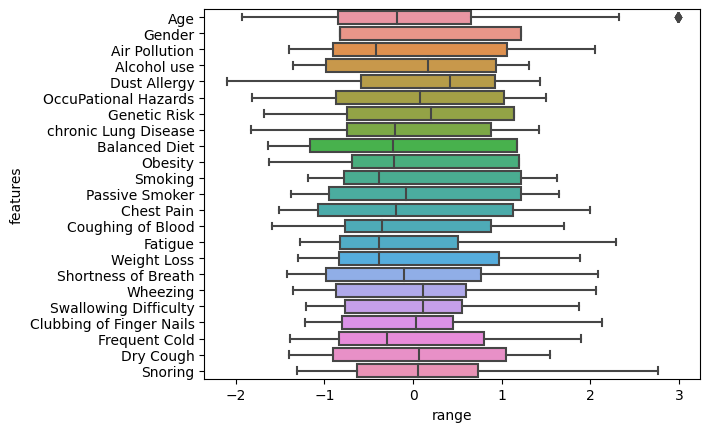

In [17]:
import seaborn as sns

sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.show()

In [20]:
def get_outliers_IQR(X):
    
    q1 = np.quantile(X, 0.25)
    q3 = np.quantile(X, 0.75)
    median = np.median(X)
    
    iqr = q3-q1
    
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    outliers = X[(X <= lower_bound) | (X >= upper_bound)]
    outliers_indices = np.where((X <= lower_bound) | (X >= upper_bound))
    return outliers, outliers_indices[0].tolist()

In [21]:
Train_copy = Train_data.copy()
Train_copy.reset_index(drop=True, inplace=True)

outliers, outlier_indices = get_outliers_IQR(Train_copy['Age'].to_numpy())

print('The outliers in the feature "Age" are: ', outliers)
print('These are available on indexes: ', outlier_indices)

The outliers in the feature "Age" are:  [2.98562727 2.98562727 2.98562727 2.98562727 2.98562727 2.98562727
 2.98562727 2.98562727]
These are available on indexes:  [147, 182, 313, 349, 502, 512, 757, 767]


In [22]:
Train_copy.drop(outlier_indices, inplace=True)
Train_copy.reset_index(drop=True, inplace=True)

Train_copy

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.764533,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105,1
1,1.318890,-0.819903,1.064362,1.312250,0.926842,1.025275,0.667941,1.418061,1.175473,-0.689782,...,0.509919,-0.841101,0.332758,-0.870694,-0.328743,-0.805663,-1.384593,1.544171,2.085555,2
2,-0.764533,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105,1
3,2.068922,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,-1.167040,-0.218941,...,-0.827281,1.426018,0.770597,0.599246,-1.210093,2.127068,-0.292643,0.072130,-0.628245,1
4,0.068836,-0.819903,-0.906679,-0.596755,-0.083340,-1.348047,-1.683965,-1.829407,-1.635543,-1.631465,...,-0.827281,-1.294525,-0.542921,0.109266,0.993281,-1.224625,-0.292643,-0.909231,-0.628245,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,-0.347848,-0.819903,1.064362,0.930449,0.926842,1.025275,1.138323,1.418061,0.706970,1.193582,...,1.847119,0.519170,1.208436,1.089226,1.433956,1.708106,1.891258,1.053491,-0.628245,2
788,-1.097880,1.219657,-1.399439,-0.978556,-1.598612,-0.873383,-1.213584,-0.205673,-1.167040,-0.689782,...,-1.273014,-1.294525,-1.418599,-0.870694,-0.328743,0.032260,0.799308,-0.909231,-1.306694,0
789,-0.097838,1.219657,-0.906679,-1.360357,-0.083340,-0.873383,-1.213584,-0.746918,-1.167040,-0.218941,...,0.955652,1.426018,-0.980760,0.599246,1.874630,-1.224625,-0.292643,-0.909231,0.050205,1
790,0.985542,-0.819903,1.064362,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,2


In [24]:
Train_data.shape

(800, 24)

In [25]:
X_train = Train_copy.iloc[:, :-1]
y_train = Train_copy.iloc[:,-1]

In [26]:
y_train

0      1
1      2
2      1
3      1
4      0
      ..
787    2
788    0
789    1
790    2
791    2
Name: Level, Length: 792, dtype: int64

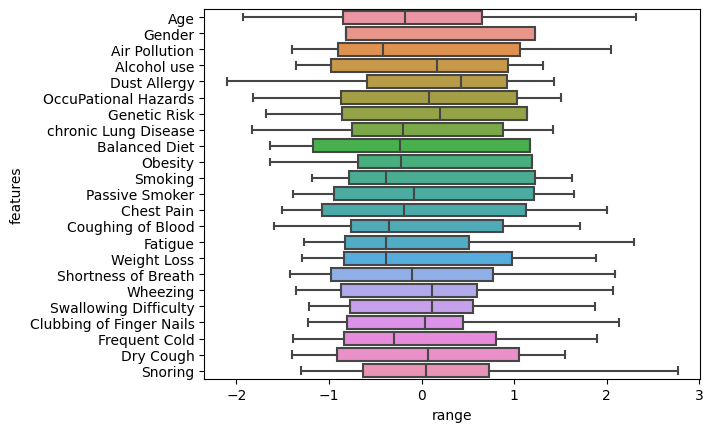

In [27]:
sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.show()

In [28]:
classes, count = np.unique(y_train, return_counts=True)
count

array([248, 261, 283], dtype=int64)

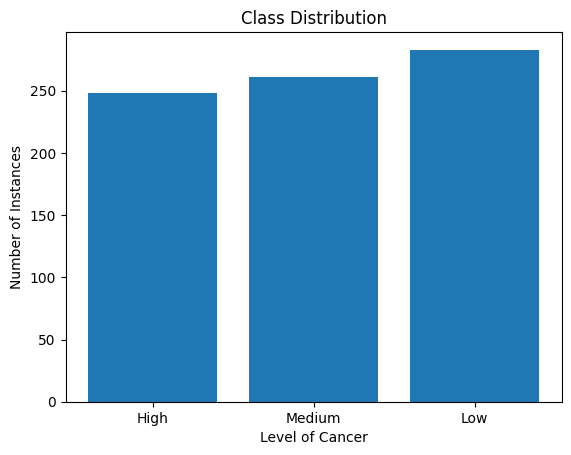

In [29]:
plt.bar(['High', 'Medium', 'Low'], count)
plt.title('Class Distribution')
plt.xlabel('Level of Cancer')
plt.ylabel('Number of Instances')
plt.show()

In [30]:
corr_mat = Train_data.corr(method='pearson')
corr_mat

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.191854,0.112653,0.165493,0.038223,0.065675,0.075813,0.135160,0.029733,0.055017,...,0.112679,0.094136,0.017161,-0.112689,-0.115542,0.017903,-0.014668,-0.015303,-0.013776,0.076185
Gender,-0.191854,1.000000,-0.203383,-0.190985,-0.172967,-0.161403,-0.191884,-0.176208,-0.083566,-0.097011,...,-0.086369,-0.050094,-0.037686,-0.037651,-0.085845,-0.007607,0.020198,-0.112208,-0.183876,-0.143545
Air Pollution,0.112653,-0.203383,1.000000,0.741563,0.633122,0.602032,0.699965,0.626605,0.530337,0.584651,...,0.206521,0.258621,0.283630,0.018940,-0.092791,0.222270,0.163484,0.252094,-0.033414,0.627957
Alcohol use,0.165493,-0.190985,0.741563,1.000000,0.817817,0.878278,0.875171,0.767691,0.662692,0.662544,...,0.242933,0.204967,0.432680,0.133833,-0.115084,0.396417,0.166852,0.195207,0.124492,0.716695
Dust Allergy,0.038223,-0.172967,0.633122,0.817817,1.000000,0.834367,0.785984,0.621833,0.655162,0.688172,...,0.339621,0.318762,0.521615,0.265628,0.021398,0.339525,0.204591,0.297409,0.045251,0.710208
OccuPational Hazards,0.065675,-0.161403,0.602032,0.878278,0.834367,1.000000,0.889365,0.857439,0.695412,0.714516,...,0.274345,0.171551,0.364401,0.134674,-0.006003,0.354671,0.069598,0.148010,0.028549,0.670837
Genetic Risk,0.075813,-0.191884,0.699965,0.875171,0.785984,0.889365,1.000000,0.838557,0.683307,0.717519,...,0.233058,0.263605,0.457550,0.169466,-0.071745,0.354825,0.081638,0.189433,-0.050962,0.703992
chronic Lung Disease,0.135160,-0.176208,0.626605,0.767691,0.621833,0.857439,0.838557,1.000000,0.633618,0.588274,...,0.249286,0.096670,0.182771,0.023430,0.001173,0.297412,0.020449,0.109036,0.048329,0.615522
Balanced Diet,0.029733,-0.083566,0.530337,0.662692,0.655162,0.695412,0.683307,0.633618,1.000000,0.695240,...,0.405741,0.003470,0.354150,0.026666,0.029961,0.046296,0.259997,0.327682,0.151529,0.709855
Obesity,0.055017,-0.097011,0.584651,0.662544,0.688172,0.714516,0.717519,0.588274,0.695240,1.000000,...,0.549541,0.317994,0.410520,0.048275,0.112671,0.156722,0.289979,0.178157,0.023844,0.808902


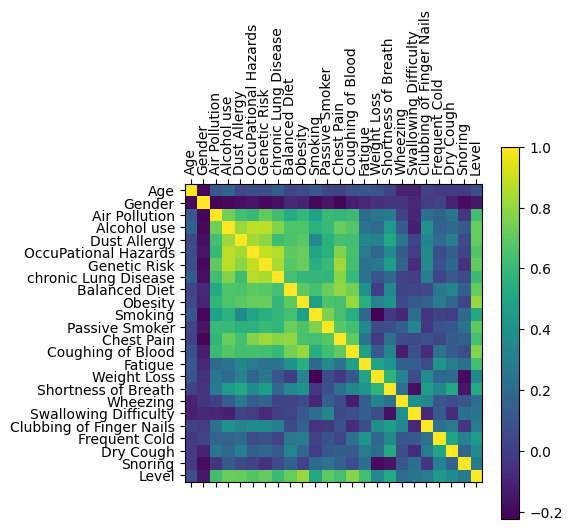

In [31]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

Text(0, 0.5, 'Level')

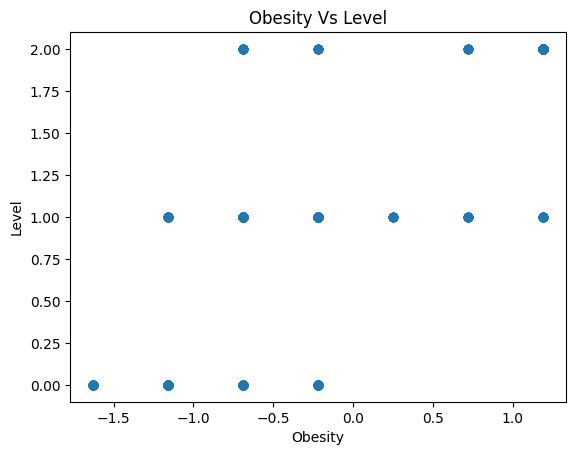

In [32]:
plt.scatter(X_train['Obesity'], y_train)
plt.title("Obesity Vs Level")
plt.xlabel("Obesity")
plt.ylabel("Level")

Text(0, 0.5, 'Level')

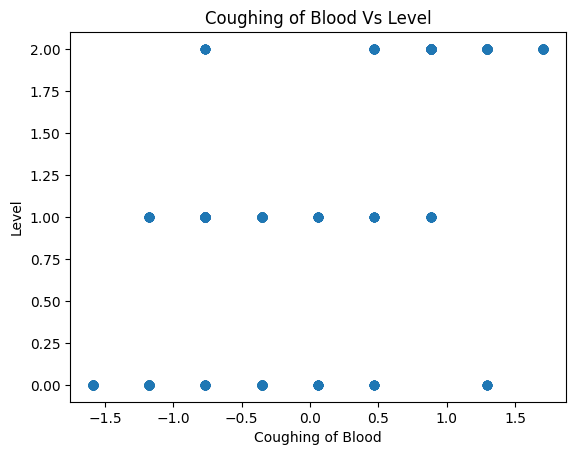

In [33]:
plt.scatter(X_train['Coughing of Blood'], y_train)
plt.title("Coughing of Blood Vs Level")
plt.xlabel("Coughing of Blood")
plt.ylabel("Level")

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test Accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  1.0
Train confusion matrix: 
 [[248   0   0]
 [  0 261   0]
 [  0   0 283]]
Test Accuracy:  0.99
Test confusion matrix: 
 [[55  0  0]
 [ 2 61  0]
 [ 0  0 82]]


In [36]:
print("Model coefficients: ", model.coef_)
print("Corresponding Features: ", features.columns.values)

Model coefficients:  [[-0.03134632  0.08161591  0.05551772 -0.34109647 -0.70859012 -0.17336822
  -0.75192148 -0.34709484  0.03367889 -1.41783093  0.28695973 -1.25395992
   0.12226191 -1.24070523 -0.54892662 -0.1261557  -0.22886247 -1.42760797
  -1.34527605 -1.57486923 -0.98888767 -0.58962303 -0.76754016]
 [ 0.00391144 -0.14906278 -0.95856956 -0.45138482  0.95311479  0.28915996
   0.29670816 -0.340873   -0.68722359  0.55110674 -0.75504937  0.07576062
  -0.14181386  0.16111634 -0.54603723 -0.39415088 -0.68068232  1.03914479
   0.33843419  0.95607301  0.71486577 -0.19038586  0.41163548]
 [ 0.02743488  0.06744687  0.90305184  0.79248129 -0.24452467 -0.11579174
   0.45521332  0.68796784  0.6535447   0.86672419  0.46808964  1.1781993
   0.01955195  1.07958889  1.09496384  0.52030658  0.90954479  0.38846319
   1.00684186  0.61879622  0.2740219   0.78000889  0.35590468]]
Corresponding Features:  ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk'